In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
runner_data = pd.read_csv("../../output/data_clean/runner_data.csv", index_col=0)
runner_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64193 entries, 0 to 64192
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   runner_id             64193 non-null  object 
 1   age                   64193 non-null  float64
 2   gender                64193 non-null  object 
 3   nationality           64193 non-null  object 
 4   n_races               64193 non-null  float64
 5   avg_relative_rank     64193 non-null  float64
 6   avg_rank              64193 non-null  float64
 7   max_relative_rank     64193 non-null  float64
 8   min_relative_rank     64193 non-null  float64
 9   total_elevation       64193 non-null  float64
 10  avg_elevation         64193 non-null  float64
 11  total_distance        64193 non-null  float64
 12  avg_distance          64193 non-null  float64
 13  min_distance          64193 non-null  float64
 14  max_distance          64193 non-null  float64
 15  total_eq_distance  

In [3]:
df = runner_data.loc[runner_data.n_races > 1]

<AxesSubplot:xlabel='count', ylabel='n_races'>

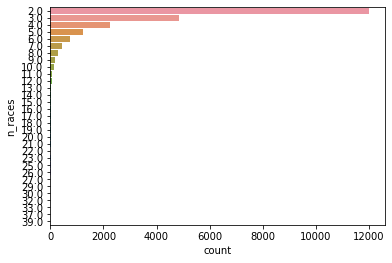

In [4]:
sns.countplot(
    y = df.n_races
)

<AxesSubplot:xlabel='age', ylabel='Count'>

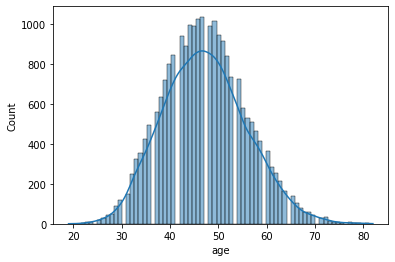

In [5]:
sns.histplot(
    x = df.age,
    kde = True
)

Index(['age', 'n_races', 'avg_relative_rank', 'avg_rank', 'max_relative_rank',
       'min_relative_rank', 'total_elevation', 'avg_elevation',
       'total_distance', 'avg_distance', 'min_distance', 'max_distance',
       'total_eq_distance', 'avg_eq_distance', 'min_eq_distance',
       'max_eq_distance', 'avg_runners', 'years_of_activity', 'avg_speed',
       'avg_equivalent_speed', 'avg_course_per_year', 'ranking_score'],
      dtype='object')


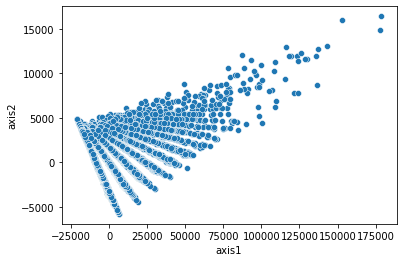

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df1 = df.drop(columns=['runner_id','gender','nationality'])
print(df1.columns)



cls = PCA(n_components=5)
pcs = cls.fit_transform(df1)

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3","axis4","axis5"])
X.index = df1.index
sns.scatterplot(x = "axis1", y = "axis2",data = X)
plt.savefig('../../../output/ACP_all_runners.pdf')


# AFTD

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS

In [8]:
df2 = runner_data.loc[runner_data.n_races > 4]
df2

,runner_id,age,gender,nationality,n_races,avg_relative_rank,avg_rank,max_relative_rank,min_relative_rank,total_elevation,...,total_eq_distance,avg_eq_distance,min_eq_distance,max_eq_distance,avg_runners,years_of_activity,avg_speed,avg_equivalent_speed,avg_course_per_year,ranking_score
13,DHAENEFrancoisFRAM36.0,36.0,M,FRA,10.0,0.006700,2.400000,0.054902,0.000376,90132.0,...,2572.02,257.202000,215.30,272.56,1391.300000,8.0,8.166439,12.490916,1.250000,14.627182
19,DAUWALTERCourtneyUSAW36.0,36.0,W,USA,8.0,0.144405,14.000000,0.777778,0.004587,57420.0,...,1907.00,238.375000,215.30,270.00,764.125000,8.0,7.279028,10.390956,1.000000,1.501655
20,CURMERGregoireFRAM31.0,31.0,M,FRA,7.0,0.005758,8.285714,0.009479,0.000368,60830.0,...,1788.80,255.542857,233.20,270.00,1510.142857,5.0,7.436122,11.197495,1.400000,6.292421
21,PAZOSDiegoSUIM37.0,37.0,M,SUI,5.0,0.004614,9.200000,0.006996,0.001570,49568.0,...,1327.88,265.576000,263.88,270.00,2020.400000,7.0,6.612203,10.547347,0.714286,1.430244
23,WONGHoChungHKGM34.0,34.0,M,HKG,5.0,0.017295,15.400000,0.030142,0.002354,46300.0,...,1307.30,261.460000,240.70,271.80,1232.600000,6.0,7.009375,10.863077,0.833333,2.918753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57848,MACKIEGlennUSAM59.0,59.0,M,USA,5.0,0.164388,152.400000,0.205691,0.119874,44757.0,...,1263.67,252.734000,216.10,265.60,839.400000,1.0,5.424166,8.241057,5.000000,0.100341
58570,GARRETTScottCANM47.0,47.0,M,CAN,5.0,0.505306,20.400000,0.739130,0.369565,18560.0,...,991.70,198.340000,185.00,216.50,43.800000,1.0,6.099967,7.482928,5.000000,0.217961
60310,EPPELMANScottUSAM55.0,55.0,M,USA,5.0,0.316468,30.200000,0.479592,0.114679,29512.0,...,1102.62,220.524000,179.00,265.45,114.200000,1.0,5.904336,7.719067,5.000000,0.164555
60526,MILESAndrewGBRM50.0,50.0,M,GBR,5.0,0.785352,73.000000,0.913043,0.598291,14202.0,...,947.82,189.564000,177.00,201.00,94.800000,1.0,5.849477,6.885358,5.000000,0.065889


In [9]:
df2_quant = df2.drop(columns=['runner_id','gender','nationality'])

In [10]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
X = pd.DataFrame(
    squareform(pdist(df2_quant)),
    columns = df2.runner_id,
    index = df2.runner_id
)

In [11]:
X

runner_id,DHAENEFrancoisFRAM36.0,DAUWALTERCourtneyUSAW36.0,CURMERGregoireFRAM31.0,PAZOSDiegoSUIM37.0,WONGHoChungHKGM34.0,TOLSTENKOAlekseiRUSM37.0,AIZPURUJonESPM33.0,DOMINGUEZLEDOJavierESPM47.0,ROVERAReneFRAM53.0,ŠTVERÁKTomášCZEM24.0,...,ANDERSONHeatherUSAW40.0,PARILLOAnthonyUSAM37.0,DAYJeremyUSAM42.0,WEBERKarynUSAW55.0,COLLIERSamUSAM69.0,MACKIEGlennUSAM59.0,GARRETTScottCANM47.0,EPPELMANScottUSAM55.0,MILESAndrewGBRM50.0,MURASEYosukeJPNM49.0
runner_id,,,,,,,,,,,,,,,,,,,,,
DHAENEFrancoisFRAM36.0,0.000000,32777.968182,29318.595605,40606.628084,43859.021806,34234.457967,30024.134385,40270.140013,40728.139883,39349.985747,...,55166.847615,58834.263113,62083.267405,66819.048421,66024.132375,45405.557158,71803.363732,60737.147039,76213.858125,57264.817330
DAUWALTERCourtneyUSAW36.0,32777.968182,0.000000,3809.226713,8444.376247,11349.456276,2731.471995,3969.632378,73033.786515,8557.737484,6754.579607,...,22390.221334,26091.487451,29311.770346,34054.275643,33258.153034,12814.243006,39035.228656,27961.226422,43454.161943,24495.860036
CURMERGregoireFRAM31.0,29318.595605,3809.226713,0.000000,11354.519859,14555.682451,4959.365865,1657.385319,69586.785723,11474.856400,10052.503582,...,25940.108849,29706.073401,32878.200106,37627.230477,36830.624797,16102.488547,42596.574995,31482.565958,47023.995304,27993.987225
PAZOSDiegoSUIM37.0,40606.628084,8444.376247,11354.519859,0.000000,3424.738670,6417.092529,10656.286538,80851.951693,147.783650,2274.639459,...,15161.259615,19094.365878,22049.363250,26779.467536,25986.385475,5049.181396,31685.809868,20543.320051,36120.073193,17039.237972
WONGHoChungHKGM34.0,43859.021806,11349.456276,14555.682451,3424.738670,0.000000,9626.605563,13883.558600,84117.612396,3320.055483,4606.572365,...,11773.422309,15737.773052,18670.566964,23407.300837,22612.592440,1628.989938,28316.298346,17158.405340,32755.704658,13648.536171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MACKIEGlennUSAM59.0,45405.557158,12814.243006,16102.488547,5049.181396,1628.989938,11189.660012,15438.828225,85665.465859,4943.642254,6081.567615,...,10181.808811,14165.524560,17080.907502,21820.255034,21024.742429,0.000000,26729.480126,15565.209670,31170.863897,12053.178167
GARRETTScottCANM47.0,71803.363732,39035.228656,42596.574995,31685.809868,28316.298346,37807.906531,42081.443026,112035.170053,31565.973963,32612.801381,...,16671.618616,13005.303071,9726.059967,4989.451275,5782.080135,26729.480126,0.000000,11169.803146,4445.169851,14681.905688
EPPELMANScottUSAM55.0,60737.147039,27961.226422,31482.565958,20543.320051,17158.405340,26664.105572,30929.973835,100990.438006,20425.793665,21468.199866,...,5584.893037,2903.841709,1769.297805,6297.521742,5510.179229,15565.209670,11169.803146,0.000000,15614.200637,3512.936334


In [ ]:
mds = MDS(n_components=2, dissimilarity='precomputed')
aftd = mds.fit_transform(X)

In [ ]:
new_Xprime = pd.DataFrame(aftd_Xprime, columns=["axis1","axis2"])
sns.scatterplot(
    x = "axis1",
    y = "axis2",
    data = new_Xprime
)
#add_labels(new_Xprime.axis1, new_Xprime.axis2, new_Xprime.index)

In [ ]:
test